# 신경망

- 퍼셉트론 이후에 다층으로 구성된 신경망을 사용.  
- 입력층, 은닉층, 출력층으로 구성됨.  
- 퍼셉트론에서의 계산에서 활성화 함수가 사용됨.

## 활성화 함수

- 활성화 함수는 딥러닝에서 중요한 역할을 하며, 어떤 함수를 쓰냐에 따라 큰 차이가 남.  
- 신경망에 비선형성을 줄수 있음.  
- 대표적인 활성화 함수는 step, sigmoid, relu등이 있음.


In [5]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
def sigmoid(x):
    y = 1/ (1+np.exp(-x))
    return y

- sigmoid의 뜻은 S자 모양이라고 한다. 함수의 모양을 보고 이름을 붙였...

In [6]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [10]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

- 활성화 함수로 비선형 함수를 써야하는 이유는 선형 함수를 사용하는 경우에는 층을 여러개 사용하는 의미가 없어지기 때문. 선형의 선형은 결국 선형이 됨.  

In [7]:
def relu(x):
    if x>0:
        return x
    else:
        return 0

In [8]:
def relu(x):
    return np.maximum(0,x)

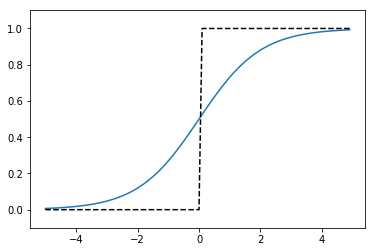

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1)
plt.show()

## 3층 신경망 구현하기

- 위 내용들로 간단하게 3층짜리 신경망을 구현해보자.
- 예시에서는 임의로 초기화 값을 사용하지만 이해를 위한것 뿐이다... 실제로는 초기화를 따로 한다.

In [13]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'],  network['W3']
    b1, b2, b3 = network['b1'], network['b2'],  network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    
    return a3

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)
    

[ 0.31682708  0.69627909]


- 여기까지만 하면 흔히 말하는 forward까지만 구현한것임.
- 하지만 출력층에서 값을 그대로 출력해주고 있음. 책에 따라서는 이 값을 스코어라고 하기도 함. 출력층에 별도의 함수를 사용하므로써 우리가 확률로써 해석할수 있도록함. 그러기 위해 사용하는 것이 softmax 함수.

In [15]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp = np.sum(exp_x)
    y = exp_x/sum_exp
    
    return y

- 소프트 맥스 함수의 구현에 exp를 사용하는데 지수함수의 값에 따라 오버플로우가 발생할수 있다.
- 이를 개선하기 위해서 exp_x에 일정(아주작은)값을 더하거나 빼주는 형식을 취하기도 한다.
- 일반적으로는 입력으로 들어오는 x의 값들중 최대값을 뺀다고 함.

In [17]:
def softmax(x):
    max_x = np.max(x)
    exp_x = np.exp(x-max_x)
    sum_exp = np.sum(exp_x)
    y = exp_x/sum_exp
    
    return y